### import libraries

In [1]:
import sys
sys.path.append('../src')

In [2]:
import numpy as np
from structure_learning.samplers import PartitionMCMC
from structure_learning.data import SyntheticDataset
from structure_learning.distributions import OPAD, Distribution
from structure_learning.data_structures import DAG
from structure_learning.scores import BGeScore
from structure_learning.evaluation.metrics import KLD, JSD, MAE, MSE, SHD

### dataset

In [3]:
np.random.seed(1000)

num_nodes = 5
node_labels = [chr(ord('a') + i) for i in range(num_nodes)]
num_obs = 10000
degree = 2
synthetic_data = SyntheticDataset(num_nodes=num_nodes, num_obs=num_obs, node_labels=node_labels, degree=degree)

00000 00000 00000 11101 00100


### ground truth

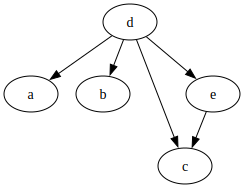

In [4]:
# visualise ground truth DAG
synthetic_data.graph.plot()

### partition MCMC (w/ OPAD-weighted results)

In [5]:
# setup mcmc
M = PartitionMCMC(max_iter=100000, data=synthetic_data.data, score_object='bge', searchspace="FULL", result_type='opad', plus1=False)

In [6]:
# run experiment
mcmc_results, acceptance = M.run()
print('Acceptance_ratio:', acceptance)

Acceptance_ratio: 0.11242


/Users/165421/Documents/code/structure_learning/examples/../src/structure_learning/distributions/distribution.py:166: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(particles[-limit:], rotation=90)


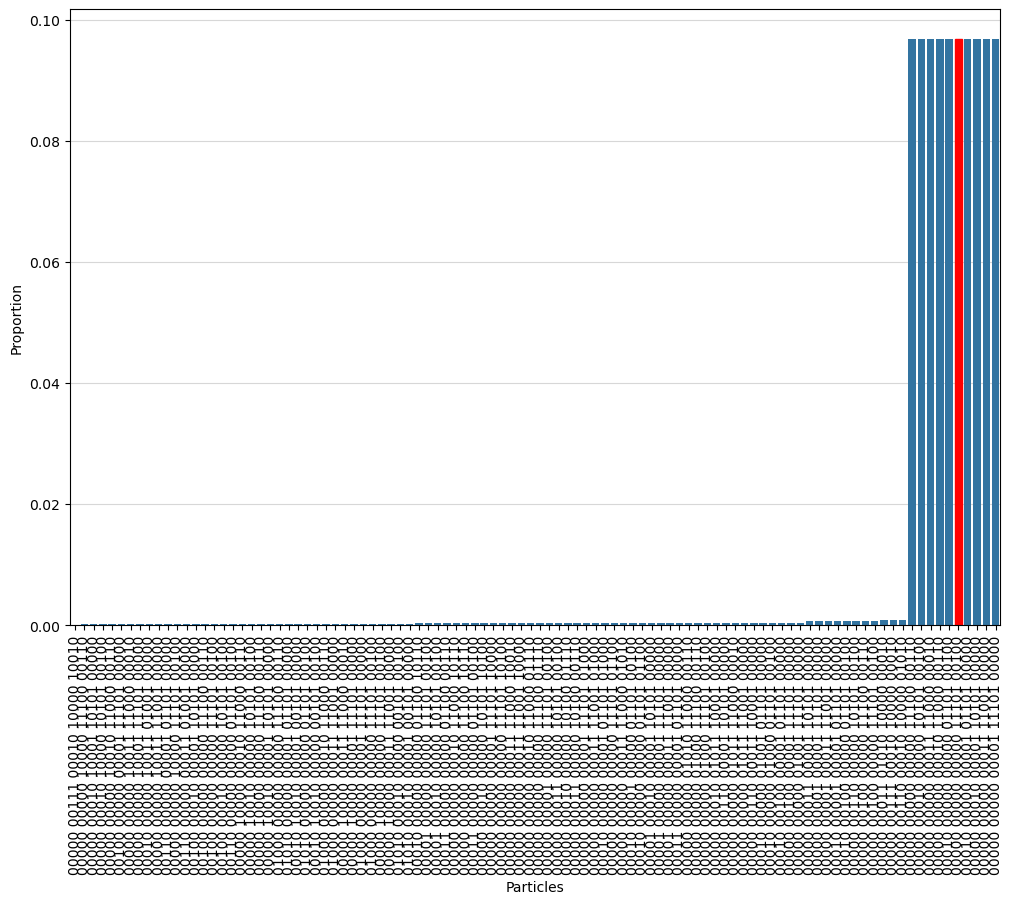

In [7]:
from matplotlib import pyplot as plt

key = synthetic_data.graph.to_key()
plt.rcParams['figure.figsize'] = 12,8
bars, keys, counts = mcmc_results.plot(sort=True, normalise=True, limit=100)
bars.containers[0][np.where(np.array(keys)==key)[0][0]].set_color('red')

### compute true distribution

/Users/165421/Documents/code/structure_learning/examples/../src/structure_learning/distributions/distribution.py:166: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(particles[-limit:], rotation=90)


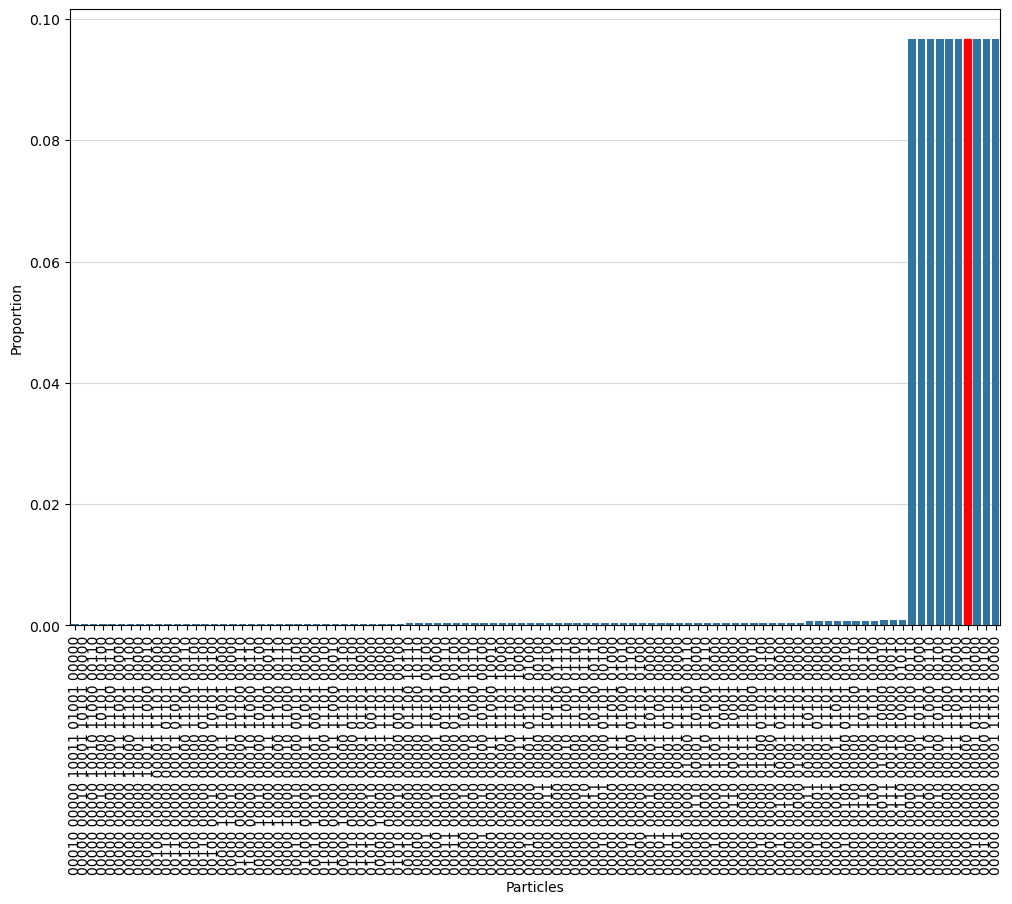

In [8]:
true_dist = Distribution.compute_distribution(synthetic_data.data, score=BGeScore)
bars2, keys, counts = true_dist.plot(prop='p', sort=True, limit=100)
bars2.containers[0][np.where(np.array(keys)==key)[0][0]].set_color('red')

### plot top graph

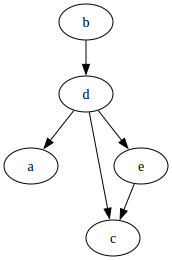

In [9]:
DAG.from_key(mcmc_results.top(n=1).item(), nodes=node_labels).plot()

### KLD

In [10]:
kld = KLD()
kld_mcmc = kld.compute(mcmc_results, true_dist)

print(kld_mcmc)

0.0009294287443644167


### JSD

In [11]:
jsd = JSD()
jsd_mcmc = jsd.compute(mcmc_results, true_dist)

print(jsd_mcmc)

0.0003219928083068096


## MSE

In [12]:
mse = MSE()
mse_mcmc = mse.compute(mcmc_results, true_dist)

print(mse_mcmc)

8.720245033123314e-12


### MAE

In [13]:
mae = MAE()
mae_mcmc = mae.compute(mcmc_results, true_dist)

print(mae_mcmc)

6.348343666015426e-08


### SHD

In [14]:
shd = SHD()
shd_mcmc = shd.compute(mcmc_results, synthetic_data.graph)

print(shd_mcmc)

0.011939097435432536
